# **ETL with Python in the Colab environment**
### **Created by:** Cristina
### **Created on:** 10/05/2025
### **Description:** refresher ETL with Python: how to load data into a pandas data frame from csv, a folder with multiple csv files, json, parquet, sqlite db

### **Challenges:** mounting the drive so I can access google drive data files from the Colab notebook was an issue, until I gave access to everything on g drive. Just document access did not work. I would prefer to be able to just give read access to only some documents.
### **Reminder** to remove the access once I am done with the project.
### **Note:** data cleaning: the field names in LA_Retail_Sales.csv had blanks and I replaced them with underscores; store_zip needs to be cleaned as it has xx in it.
### **Note:** For more heavy duty querying, use sqlalchemy. Will upgrade to that in the next version.
### **Data Sources**: Maven Analytics https://www.youtube.com/watch?v=3H-uZK8--4g

### **To be continued**

In [ ]:
import pandas as pd
import sqlite3
import glob
import matplotlib.pyplot as plt

#this works if I give access to everything on gdrive which is annoying
from google.colab import drive
drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:


str='/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/'

#load sales data from csv to df:
#sales_df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales.csv')
sales_df = pd.read_csv(str+'LA_Retail_Sales.csv')

sales_df.head(20)




,store_id,store_name,product_category,date,Unit sales,DOLLAR SALES,store_zip,promotion_flag
0,LA002,Store_2,Household,9/1/24,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,9/1/24,14.0,86.63,90004,True
2,LA004,Store_4,Produce,9/15/24,18.0,298.26,90003,True
3,LA003,Store_3,Household,9/7/24,7.0,25.69,90001,True
4,LA008,Store_8,Beverages,9/18/24,25.0,85.46,90005,False
5,LA004,Store_4,Beverages,9/23/24,3.0,41.71,90004,False
6,LA005,Store_5,Household,9/15/24,11.0,95.30,90001,True
7,LA010,Store_10,Snacks,9/21/24,35.0,529.35,900XX,True
8,LA009,Store_9,Household,9/8/24,50.0,798.40,90001,True
9,LA004,Store_4,Produce,9/30/24,46.0,352.55,90003,False


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          750 non-null    object 
 1   store_name        750 non-null    object 
 2   product_category  750 non-null    object 
 3   date              750 non-null    object 
 4   Unit sales        745 non-null    float64
 5   DOLLAR SALES      743 non-null    float64
 6   store_zip         750 non-null    object 
 7   promotion_flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [25]:
#clean headers (replace blanks with underscores):
sales_df.columns = sales_df.columns.str.lower().str.replace(" ", "_")
sales_df.head()

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA002,Store_2,Household,9/1/24,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,9/1/24,14.0,86.63,90004,True
2,LA004,Store_4,Produce,9/15/24,18.0,298.26,90003,True
3,LA003,Store_3,Household,9/7/24,7.0,25.69,90001,True
4,LA008,Store_8,Beverages,9/18/24,25.0,85.46,90005,False


In [26]:
#get multiple sales files from a folder and add them to a df:
file_paths=glob.glob('/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/*.csv')
print (file_paths)

['/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-04.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-29.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-16.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-15.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-05.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-22.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-30.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-07.csv', '/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-02.csv', '/content

In [28]:
sales_df2= pd.concat([pd.read_csv(fp) for fp in file_paths], ignore_index=True)
sales_df2.head()


,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA004,Store_4,Household,2024-09-04,44.0,563.53,90005,True
1,LA005,Store_5,Snacks,2024-09-04,19.0,115.80,90001,True
2,LA008,Store_8,Snacks,2024-09-04,32.0,601.21,90004,False
3,LA006,Store_6,Household,2024-09-04,37.0,224.62,90005,False
4,LA001,Store_1,Household,2024-09-04,15.0,167.88,90005,True


In [29]:
sales_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          750 non-null    object 
 1   store_name        750 non-null    object 
 2   product_category  750 non-null    object 
 3   date              750 non-null    object 
 4   unit_sales        745 non-null    float64
 5   dollar_sales      743 non-null    float64
 6   store_zip         750 non-null    object 
 7   promotion_flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [38]:
#read only specific files from the folder (first 5 files)
sales_df = pd.DataFrame()  #create an empty data frame
for day in range(1,6):
    print(day)
    #read files in the format sales_2024-09-xx.csv to day_df:
    day_df=pd.read_csv(f"/content/gdrive/My Drive/Colab Notebooks/ETL Py/Spring Skillup/LA_Retail_Sales_By_Day/sales_2024-09-{day:02d}.csv")
    sales_df=pd.concat([sales_df, day_df])
    print (len(sales_df))
sales_df.head()

1
30
2
57
3
81
4
97
5
120


,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA002,Store_2,Household,2024-09-01,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,2024-09-01,14.0,86.63,90004,True
2,LA008,Store_8,Produce,2024-09-01,4.0,79.99,90001,False
3,LA010,Store_10,Beverages,2024-09-01,22.0,140.45,90005,True
4,LA006,Store_6,Snacks,2024-09-01,17.0,50.03,90003,False


In [37]:
#load from json files (key value pairs - like a python dictionary)
sales_df = pd.read_json(str+"LA_Retail_Sales.json", lines = True)
sales_df.head()

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA002,Store_2,Household,2024-09-01,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,2024-09-01,14.0,86.63,90004,True
2,LA004,Store_4,Produce,2024-09-15,18.0,298.26,90003,True
3,LA003,Store_3,Household,2024-09-07,7.0,25.69,90001,True
4,LA008,Store_8,Beverages,2024-09-18,25.0,85.46,90005,False


In [36]:
#load from parquet files
sales_df = pd.read_parquet(str+"LA_Retail_Sales.parquet")
sales_df.head()

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA002,Store_2,Household,2024-09-01,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,2024-09-01,14.0,86.63,90004,True
2,LA004,Store_4,Produce,2024-09-15,18.0,298.26,90003,True
3,LA003,Store_3,Household,2024-09-07,7.0,25.69,90001,True
4,LA008,Store_8,Beverages,2024-09-18,25.0,85.46,90005,False


In [39]:
#load from a database (extract from SQL)
conn=sqlite3.connect(str+"la_sales.sqlite")
sales_df=pd.read_sql("SELECT * FROM Sales", con=conn)
sales_df

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag,rev_per_unit,temp
0,LA002,Store_2,Household,2024-09-01 00:00:00,16,96.28,90004,1,6.02,71.19
1,LA001,Store_1,Beverages,2024-09-01 00:00:00,14,86.63,90004,1,6.19,71.19
2,LA004,Store_4,Produce,2024-09-15 00:00:00,18,298.26,90003,1,16.57,63.91
3,LA003,Store_3,Household,2024-09-07 00:00:00,7,25.69,90001,1,3.67,78.37
4,LA008,Store_8,Beverages,2024-09-18 00:00:00,25,85.46,90005,0,3.42,60.82
...,...,...,...,...,...,...,...,...,...,...
733,LA010,Store_10,Beverages,2024-09-24 00:00:00,46,790.99,90005,1,17.20,66.04
734,LA008,Store_8,Snacks,2024-09-14 00:00:00,23,375.40,90003,0,16.32,64.98
735,LA004,Store_4,Personal Care,2024-09-14 00:00:00,17,225.24,90000,0,13.25,64.98
736,LA009,Store_9,Snacks,2024-09-28 00:00:00,37,406.47,90004,0,10.99,65.03


In [40]:
#load from a database and aggregate:
#use ''' so I can do multiline sql
sales_df=pd.read_sql('''
    SELECT store_id, sum(dollar_sales) AS total_sales
    FROM Sales
    GROUP BY store_id
    ORDER BY total_sales DESC

''', con=conn)
sales_df

,store_id,total_sales
0,LA010,26671.40
1,LA006,23636.70
2,LA009,22089.83
3,LA001,20941.15
4,LA008,20765.75
5,LA003,20731.63
6,LA002,20130.76
7,LA005,19757.50
8,LA004,16749.46
9,LA007,15554.02


<Axes: >

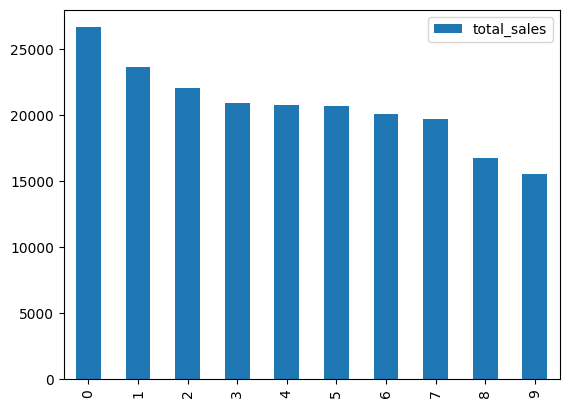

In [41]:
#plot - this plot works here in colab, however it did not work in vscode
sales_df.plot.bar()

<Axes: xlabel='store_id'>

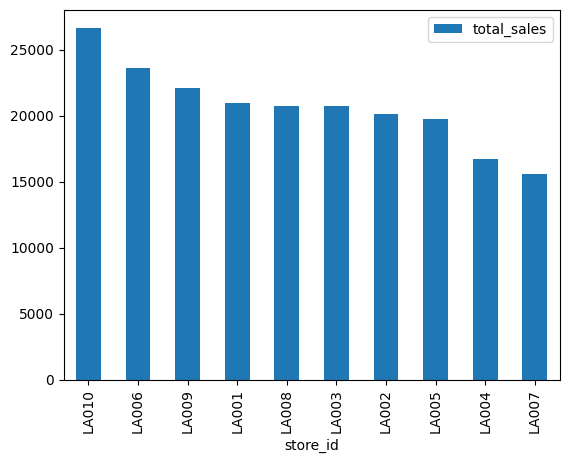

In [43]:
#adding the set_index to display the store_id on the x axis
sales_df.set_index('store_id').plot.bar()

### Extracting with API

## Transforming data with Python